# Identify Digits_DSA

Make predictions of handwritten digits in the mnist dataset.

In [1]:
# Imports
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import dataset
digitos = datasets.load_digits()

# Split X and Y
X = digitos.data
Y = digitos.target

In [2]:
# Split Train and Test
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.30, random_state = 101)

# Split Train and Validation
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, Y_treino, test_size = 0.1, random_state = 84)

# Normalization with mean
X_norm = np.mean(X, axis = 0)
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = testeData - X_norm

#### Testing best value of k

In [3]:
kVals = range(1, 30, 2)
acuracias = []

for k in kVals:
    
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(treinoData, treinoLabels)
    score = modeloKNN.score(validData, validLabels)
    print("For k = %d, the accuracy is = %.2f%%" % (k, score * 100))
    acuracias.append(score)

For k = 1, the accuracy is = 99.21%
For k = 3, the accuracy is = 100.00%
For k = 5, the accuracy is = 100.00%
For k = 7, the accuracy is = 99.21%
For k = 9, the accuracy is = 98.41%
For k = 11, the accuracy is = 98.41%
For k = 13, the accuracy is = 97.62%
For k = 15, the accuracy is = 97.62%
For k = 17, the accuracy is = 97.62%
For k = 19, the accuracy is = 97.62%
For k = 21, the accuracy is = 97.62%
For k = 23, the accuracy is = 97.62%
For k = 25, the accuracy is = 96.83%
For k = 27, the accuracy is = 96.83%
For k = 29, the accuracy is = 96.83%


In [4]:
# Best k value
i = np.argmax(acuracias)
print("The value of k = %d achieved the highest accuracy of %.2f%% in the validation data!" % (kVals[i], acuracias[i] * 100))

The value of k = 3 achieved the highest accuracy of 100.00% in the validation data!


#### Building and training model KNN

In [5]:
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(n_neighbors=3)

#### Prevision with test and vaditaion model

In [6]:
predictions = modeloFinal.predict(testeData)
print("Model evaluation")
print(classification_report(testeLabels, predictions))

Model evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.96      1.00      0.98        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [7]:
print ("Confusion matrix")
print(confusion_matrix(testeLabels, predictions))

Confusion matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  1]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


I believe this digit is: 7


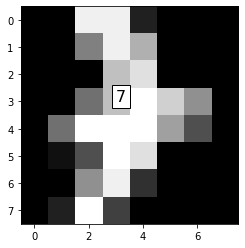

I believe this digit is: 2


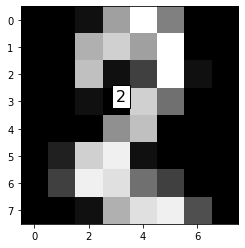

I believe this digit is: 8


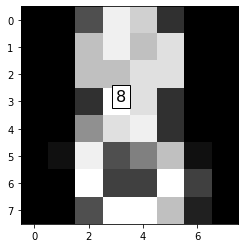

I believe this digit is: 1


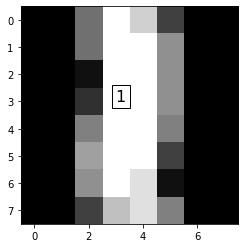

I believe this digit is: 9


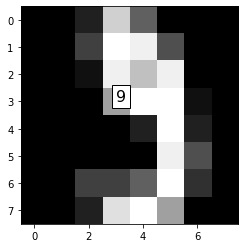

In [8]:
# previsions
for i in np.random.randint(0, high=len(testeLabels), size=(5,)):
         
    image = testeData[i]
    prediction = modeloFinal.predict([image])[0]
         
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("I believe this digit is: {}".format(prediction))
    plt.show()